# Data Science Final Project
Charles Laurent, Jenny Park, AJ Marino

## Part 2 - Decision Tree

In [5]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import metrics

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:96% !important; }</style>"))

pd.set_option('display.max_columns', None)

In [3]:
# TODO - Update path to files
datadir=r'C:\Users\jooyi\OneDrive\Documents\NYU\Fall 2019\Analytics\FInal Project\data-science-business-analytics-final-project-master\CollegeScorecard_Raw_Data\CollegeScorecard_Raw_Data'

In [5]:
# import collegedatalib
import collegedatahelper

In [10]:
import scipy
from sklearn import tree
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from IPython.display import Image
import os


In [6]:
data_dict = collegedatahelper.create_data_dict(datadir)

In [7]:
df = data_dict['2012_13']

In [8]:
# CONTROL 
# 1 - Public
# 2 - Private non-profit
# 3 - Private for-profit
df_pub = collegedatahelper.clean_df(df.loc[df['CONTROL'] == 1])
df_priv = collegedatahelper.clean_df(df.loc[df['CONTROL'] == 2])
df_priv_profit = collegedatahelper.clean_df(df.loc[df['CONTROL'] == 3])

In [9]:
# for loop to create DTI for all df
for frame in [df_pub, df_priv, df_priv_profit]:
    frame['D_T_I'] = frame['DEBT_MDN']/frame['MD_EARN_WNE_P6']
    
#'DEBT_MDN' / 'MD_EARN_WNE_P6'

In [ ]:
# change feature columns with our variable
feature_cols = ['ST_FIPS','DEP_INC_N','PAR_ED_N','ICLEVEL','UGDS_MEN','UGDS_WOMEN']

#['NPT4_3075_PUB', 'NPT4_75UP_PUB', 'NUM44_PUB', 'CIP54CERT2','NUM45_PUB', 'CIP52ASSOC', 'NPT4_048_PUB', 'CIP12BACHL', 'CIP54BACHL',
       #'PCIP31', 'UGDS_WHITE', 'NUM41_PUB', 'UGDS_BLACK', 'UGDS_2MOR',
       #'CIP52BACHL', 'CIP52CERT4', 'DISTANCEONLY', 'NUM43_PUB', 'CIP54CERT1',
       #'NUM42_PUB']

#'ADM_RATE','PELL_ENRL_ORIG_YR8_RT',

## Set up for Decision Tree

In [12]:
X = df_pub[feature_cols]
Y = df_pub.D_T_I

In [13]:
#data split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [36]:
# for loop for data split
def gen_tree(df): 
    X = df[feature_cols]
    Y = df.D_T_I
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
    dtr = DecisionTreeRegressor()
    dtr = DecisionTreeRegressor(max_depth = 4)
    dtr = dtr.fit(X_train,Y_train)
    tree_output = tree.plot_tree(dtr)
    #return tree_output


## Public School

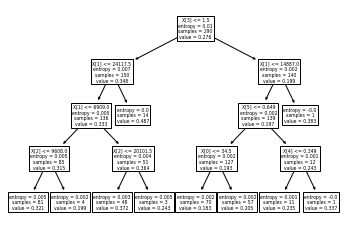

In [37]:
gen_tree(df_pub)

## Private School Non-Profit

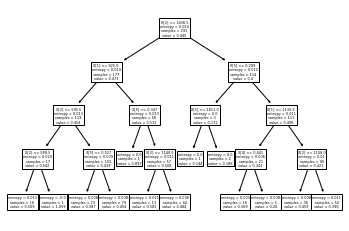

In [38]:
gen_tree(df_priv)

## Private School For-Profit

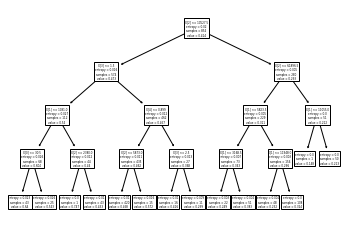

In [39]:
gen_tree(df_priv_profit)

[Text(188.32500000000002, 195.696, 'X[3] <= 1.5\nentropy = 0.01\nsamples = 290\nvalue = 0.276'),
 Text(104.625, 152.208, 'X[1] <= 24117.5\nentropy = 0.007\nsamples = 150\nvalue = 0.348'),
 Text(83.7, 108.72, 'X[1] <= 6909.0\nentropy = 0.005\nsamples = 136\nvalue = 0.333'),
 Text(41.85, 65.232, 'X[2] <= 9608.0\nentropy = 0.005\nsamples = 85\nvalue = 0.315'),
 Text(20.925, 21.744, 'entropy = 0.005\nsamples = 81\nvalue = 0.321'),
 Text(62.775000000000006, 21.744, 'entropy = 0.002\nsamples = 4\nvalue = 0.199'),
 Text(125.55000000000001, 65.232, 'X[2] <= 20101.5\nentropy = 0.004\nsamples = 51\nvalue = 0.364'),
 Text(104.625, 21.744, 'entropy = 0.003\nsamples = 48\nvalue = 0.372'),
 Text(146.475, 21.744, 'entropy = 0.005\nsamples = 3\nvalue = 0.243'),
 Text(125.55000000000001, 108.72, 'entropy = 0.0\nsamples = 14\nvalue = 0.487'),
 Text(272.02500000000003, 152.208, 'X[1] <= 14887.0\nentropy = 0.002\nsamples = 140\nvalue = 0.199'),
 Text(251.10000000000002, 108.72, 'X[5] <= 0.649\nentropy = 0

[Text(167.4, 195.696, 'X[2] <= 1436.5\nentropy = 0.014\nsamples = 291\nvalue = 0.445'),
 Text(98.91818181818182, 152.208, 'X[1] <= 925.0\nentropy = 0.014\nsamples = 177\nvalue = 0.473'),
 Text(60.872727272727275, 108.72, 'X[2] <= 595.5\nentropy = 0.013\nsamples = 119\nvalue = 0.454'),
 Text(30.436363636363637, 65.232, 'X[2] <= 589.5\nentropy = 0.029\nsamples = 17\nvalue = 0.542'),
 Text(15.218181818181819, 21.744, 'entropy = 0.013\nsamples = 16\nvalue = 0.509'),
 Text(45.654545454545456, 21.744, 'entropy = -0.0\nsamples = 1\nvalue = 1.059'),
 Text(91.30909090909091, 65.232, 'X[4] <= 0.473\nentropy = 0.009\nsamples = 102\nvalue = 0.439'),
 Text(76.0909090909091, 21.744, 'entropy = 0.008\nsamples = 79\nvalue = 0.454'),
 Text(106.52727272727273, 21.744, 'entropy = 0.008\nsamples = 23\nvalue = 0.387'),
 Text(136.96363636363637, 108.72, 'X[5] <= 0.347\nentropy = 0.013\nsamples = 58\nvalue = 0.513'),
 Text(121.74545454545455, 65.232, 'entropy = 0.0\nsamples = 1\nvalue = 0.897'),
 Text(152.18

[Text(189.1, 195.696, 'X[2] <= 10527.5\nentropy = 0.02\nsamples = 854\nvalue = 0.414'),
 Text(99.2, 152.208, 'X[3] <= 1.5\nentropy = 0.016\nsamples = 574\nvalue = 0.473'),
 Text(49.6, 108.72, 'X[1] <= 1081.0\nentropy = 0.027\nsamples = 112\nvalue = 0.54'),
 Text(24.8, 65.232, 'X[0] <= 30.5\nentropy = 0.026\nsamples = 68\nvalue = 0.604'),
 Text(12.4, 21.744, 'entropy = 0.023\nsamples = 43\nvalue = 0.64'),
 Text(37.2, 21.744, 'entropy = 0.026\nsamples = 25\nvalue = 0.543'),
 Text(74.4, 65.232, 'X[2] <= 2380.0\nentropy = 0.012\nsamples = 44\nvalue = 0.44'),
 Text(62.0, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = 0.747'),
 Text(86.8, 21.744, 'entropy = 0.01\nsamples = 43\nvalue = 0.433'),
 Text(148.8, 108.72, 'X[4] <= 0.899\nentropy = 0.012\nsamples = 462\nvalue = 0.457'),
 Text(124.0, 65.232, 'X[2] <= 5873.0\nentropy = 0.011\nsamples = 435\nvalue = 0.462'),
 Text(111.60000000000001, 21.744, 'entropy = 0.01\nsamples = 420\nvalue = 0.458'),
 Text(136.4, 21.744, 'entropy = 0.016\nsamples = 

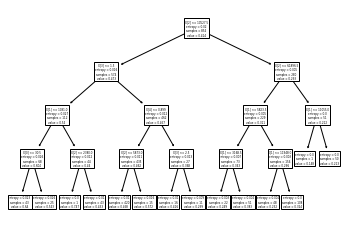

In [33]:
# for all three dfs
for i in [df_pub, df_priv, df_priv_profit]:
    display(gen_tree(i))

## Set up for Testing Functions

In [14]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor()
dtr = DecisionTreeRegressor(max_depth = 4)
dtr = dtr.fit(X_train,Y_train)

In [15]:
#copy of the code in names_decision_tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import os

def visualize_tree(decision_tree, feature_names, class_names=True, directory="./", name="tree",proportion=True):
    # Export our decision tree to graphviz format
    dot_name = "%s/%s.dot" % (directory, name)
    dot_file = export_graphviz(decision_tree, out_file=dot_name,
                               feature_names=feature_names, class_names=class_names,proportion=proportion)
    # Call graphviz to make an image file from our decision tree
    image_name = "%s/%s.png" % (directory, name)
    os.system("dot -T png %s -o %s" % (dot_name, image_name))
    # Return the .png image so we can see it
    return Image(filename=image_name)

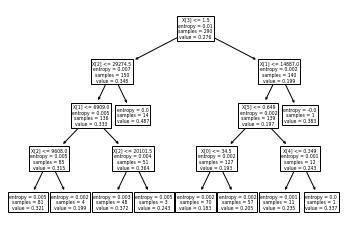

In [16]:
from sklearn import tree
tree_output = tree.plot_tree(dtr)

## For testing Classifier Function

In [20]:
#make the variable binary
from sklearn import metrics
from sklearn import cluster

frames = ['df_pub', 'df_priv', 'df_priv_profit']
for i, frame in enumerate([df_pub, df_priv, df_priv_profit]):
    debt2income_mat=frame[['CONTROL','D_T_I']]#df_priv[['DEBT_MDN','MD_EARN_WNE_P10']]
    thisKMeans = cluster.KMeans(2) #12 clusters
    thisKMeans.fit(debt2income_mat)
    clusterDistances = thisKMeans.transform(debt2income_mat) #distances from each center
    frame['cluster'] = thisKMeans.predict(debt2income_mat)
    mean = (frame[frame['cluster']==0]['D_T_I'].mean() + frame[frame['cluster']==1]['D_T_I'].mean()) / 2 # CLUSTERS OF INDEBTEDNESS
    print(f'{frames[i]}: {mean}')
    print(f'{frames[i]} - max: {frame.D_T_I.max()}')
    frame['higheravgdebt'] = (frame['D_T_I'] > mean).astype(int)


df_pub: 0.286754448489692
df_pub - max: 0.5345706371191136
df_priv: 0.4480147269492252
df_priv - max: 1.0585585585585586
df_priv_profit: 0.44525142352276337
df_priv_profit - max: 0.9271226415094339


In [21]:
#define variable
X = df_pub[feature_cols]
Y1 = df_pub.higheravgdebt

In [22]:
#split data
X_train, X_test, Y1_train, Y1_test = train_test_split(X, Y1, test_size=0.3, random_state=1)

In [23]:
dtf = DecisionTreeClassifier()

dtf = dtf.fit(X_train,Y1_train)

In [24]:
from sklearn.tree import export_graphviz
from IPython.display import Image

def visualize_tree(decision_tree, feature_names, class_names, directory="./", name="tree",proportion=True):
    # Export our decision tree to graphviz format
    dot_name = "%s/%s.dot" % (directory, name)
    dot_file = export_graphviz(decision_tree, out_file=dot_name,
                               feature_names=feature_names, class_names=class_names,proportion=proportion)
    # Call graphviz to make an image file from our decision tree
    image_name = "%s/%s.png" % (directory, name)
    os.system("dot -T png %s -o %s" % (dot_name, image_name))
    # Return the .png image so we can see it
    return Image(filename=image_name)



In [40]:
visualize_tree(dtf,feature_cols,"higheravgdebt")

FileNotFoundError: [Errno 2] No such file or directory: './/tree.png'

In [42]:
#import classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y1_train)
columns=list(X_train.columns)
dot_data = export_graphviz(dtc,out_file=None,feature_names=columns,class_names=True)
graph = graphviz.Source(dot_data)
graph.render("image",view=True)
f = open("classifiers/classifier.txt","w+")
f.write(dot_data)
f.close()

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'image'], make sure the Graphviz executables are on your systems' PATH

In [17]:
#from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#pip install pydotplus
#import pydotplus

#dot_data = StringIO()
#export_graphviz(dtf, out_file=dot_data,filled=True, rounded=True,
#                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('df_pub.png')
#Image(graph.create_png())

SyntaxError: invalid syntax (<ipython-input-17-35e86ddedbdc>, line 4)

In [30]:
import graphviz
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,export_graphviz
from sklearn.datasets import make_regression

# Generate a simple dataset
X, y = make_regression(n_features=2, n_informative=2, random_state=0)
clf = DecisionTreeRegressor(random_state=0, max_depth=2)
clf.fit(X, y)
# Visualize the tree
from IPython.display import display
display(graphviz.Source(export_graphviz(clf)))

ModuleNotFoundError: No module named 'graphviz'

In [19]:
#split df_pub data
#df_train_pub, df_test_pub = train_test_split(df_pub, test_size=0.2)

In [17]:
print(df_train_pub.shape)
print(df_test_pub.shape)

(332, 861)
(83, 861)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2483b190>]],
      dtype=object)

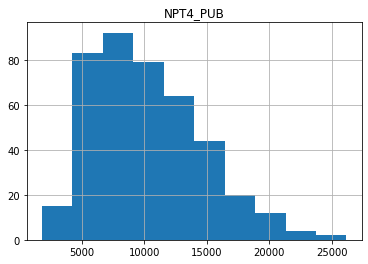

In [8]:
df_pub.hist(column='NPT4_PUB')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a248310d0>]],
      dtype=object)

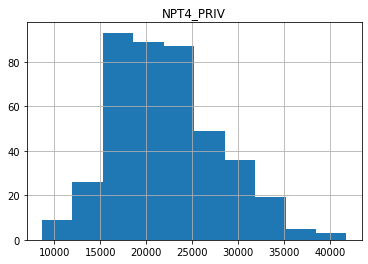

In [9]:
df_priv.hist(column='NPT4_PRIV')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25b2c090>]],
      dtype=object)

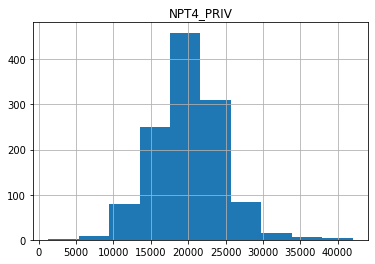

In [10]:
df_priv_profit.hist(column='NPT4_PRIV')